In [46]:
import h5py
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image


######## Very basic access to the dataset - let's see what we are working with! #######
raw_dataset = h5py.File('climatevisions_2019.h5','r+') 
image_directory = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"
contents = os.listdir(image_directory)
print(contents)

# Access the 'upper' data - we only have tweet data 
for item in raw_dataset.keys():
   continue
#  print("Items: " + item)    
    
# Access the actual subgroups with data for us - different info we can look at - mostly things provided in Excel by Katharina
for item in raw_dataset.require_group('tweet_data').keys():
    continue
    #print(item)


['Dataset_small']


In [44]:
# Access the dataset within the group
dataset = raw_dataset['tweet_data']  ## excludes unnecessary information - only tweet_data
 
# Create a dictionary to store column data
data_dict = {}
    
# Iterate through the keys (assuming each key is a column name)
for key in dataset.keys():
     # Access the data for each column
     column_data = dataset[key][:]
        
     # Store the data in the dictionary with the column name as the key
     data_dict[key] = column_data
 
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data_dict)
df.head()


,author_id,created_at,edit_history_tweet_ids,entities_annotations,entities_cashtags,entities_hashtags,entities_mentions,entities_urls,geo_coord_data,geo_coord_type,...,possibly_sensitive,quote_count,referenced_tweets,reply_count,retweet_count,source,text,tweet_id,withheld_copyright,withheld_countrycode
0,b'24931983',b'2019-01-01T23:59:01.000Z',b'1080252082781855744',"b'start:30, end:31, probability:0.4413, type:P...",b':NA',b'NA',b'NA',"b'start1:66, start2:90, end1:89, end2:113, url...",b'NA',b'NA',...,True,0,b'NA',0,0,b'CoSchedule',b'Kids Win the Right to Sue the US Government ...,b'1080252082781855744',b'NA',b'NA'
1,b'2602968048',b'2019-01-01T23:57:02.000Z',b'1080251584729223173',b'NA',b':NA',b'NA',b'NA',"b'start:278, end:301, url:https://t.co/is0NHYP...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter Web Client',b'Wat zou de eenvoudigste verklaring zijn dat ...,b'1080251584729223173',b'NA',b'NA'
2,b'734730931848634368',b'2019-01-01T23:55:49.000Z',b'1080251277693595649',b'NA',b':NA',b'NA',b'NA',"b'start1:55, start2:260, end1:78, end2:283, ur...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter for iPad',"b""Here's what's on the radar for climate chang...",b'1080251277693595649',b'NA',b'NA'
3,b'1242955585',b'2019-01-01T23:53:00.000Z',b'1080250568583585792',"b'start:52, end:78, probability:0.4544, type:O...",b':NA',b'NA',"b'start1:82, start2:99, end1:95, end2:109, use...","b'start1:140, start2:164, end1:163, end2:187, ...",b'NA',b'NA',...,True,0,b'NA',0,0,b'TweetDeck',"b'The biggest story of the year, for all of hu...",b'1080250568583585792',b'NA',b'NA'
4,b'18085565',b'2019-01-01T23:51:36.000Z',b'1080250217524539393',"b'start:122, end:127, probability:0.7755, type...",b':NA',"b'start1:184, start2:239, start3:262, end1:196...","b'start1:248, start2:275, end1:261, end2:283, ...","b'start:284, end:307, url:https://t.co/jqCU6Ds...",b'NA',b'NA',...,True,0,b'NA',0,0,b'Twitter Web Client',b'Still celebrating 2016 w stale Crystal & ran...,b'1080250217524539393',b'NA',b'NA'


# Preprocessing

In [47]:
# strip of "b'" of all strings

cols_to_strip = [
        'author_id', 'created_at', 'edit_history_tweet_ids', 'entities_annotations', 
        'entities_hashtags', 'entities_mentions', 'entities_urls', 'geo_coord_data',
        'geo_coord_type', 'geo_placeid', 'img_name', 'img_size', 'in_reply_to_user_id',
        'lang', 'media_keys', 'referenced_tweets', 'source', 'text', 'tweet_id', 
        'withheld_copyright', 'withheld_countrycode', 'entities_cashtags'
        ]   

df[cols_to_strip] = df[cols_to_strip].astype('string')
df[cols_to_strip] = df[cols_to_strip].replace(to_replace=r'^b\':?(.*)\'$', value=r'\1', regex=True)
df['img_name'] = df['img_name'].str.rstrip('\n')


print(df.shape)
df.dtypes

# replace string NA to "real" missing value for further analysis
df = df.replace(r'^NA$', np.nan, regex=True)
df.isna().sum()


## only keep images here
# drop all columns exepct img_ columns
selected_columns = ['img_name', 'img_size']
df_selected = df.loc[:, selected_columns]
df_selected.head()

(714769, 27)


,img_name,img_size
0,id_1080252082781855744_2019-01-01.jpg,"(533, 1200, 3)"
1,id_1080251584729223173_2019-01-01.jpg,"(675, 1200, 3)"
2,id_1080251277693595649_2019-01-01.jpg,"(349, 620, 3)"
3,id_1080250568583585792_2019-01-01.jpg,"(348, 620, 3)"
4,id_1080250217524539393_2019-01-01.jpg,"(720, 960, 3)"


print(df_selected['img_name'].iloc[0])

Image.open

In [48]:
df.head()

,author_id,created_at,edit_history_tweet_ids,entities_annotations,entities_cashtags,entities_hashtags,entities_mentions,entities_urls,geo_coord_data,geo_coord_type,...,possibly_sensitive,quote_count,referenced_tweets,reply_count,retweet_count,source,text,tweet_id,withheld_copyright,withheld_countrycode
0,24931983,2019-01-01T23:59:01.000Z,1080252082781855744,"start:30, end:31, probability:0.4413, type:Pla...",:NA,<NA>,<NA>,"start1:66, start2:90, end1:89, end2:113, url1:...",<NA>,<NA>,...,True,0,<NA>,0,0,CoSchedule,Kids Win the Right to Sue the US Government Ov...,1080252082781855744,<NA>,<NA>
1,2602968048,2019-01-01T23:57:02.000Z,1080251584729223173,<NA>,:NA,<NA>,<NA>,"start:278, end:301, url:https://t.co/is0NHYP90...",<NA>,<NA>,...,True,0,<NA>,0,0,Twitter Web Client,Wat zou de eenvoudigste verklaring zijn dat er...,1080251584729223173,<NA>,<NA>
2,734730931848634368,2019-01-01T23:55:49.000Z,1080251277693595649,<NA>,:NA,<NA>,<NA>,"start1:55, start2:260, end1:78, end2:283, url1...",<NA>,<NA>,...,True,0,<NA>,0,0,Twitter for iPad,Here's what's on the radar for climate change ...,1080251277693595649,<NA>,<NA>
3,1242955585,2019-01-01T23:53:00.000Z,1080250568583585792,"start:52, end:78, probability:0.4544, type:Oth...",:NA,<NA>,"start1:82, start2:99, end1:95, end2:109, usern...","start1:140, start2:164, end1:163, end2:187, ur...",<NA>,<NA>,...,True,0,<NA>,0,0,TweetDeck,"The biggest story of the year, for all of huma...",1080250568583585792,<NA>,<NA>
4,18085565,2019-01-01T23:51:36.000Z,1080250217524539393,"start:122, end:127, probability:0.7755, type:P...",:NA,"start1:184, start2:239, start3:262, end1:196, ...","start1:248, start2:275, end1:261, end2:283, us...","start:284, end:307, url:https://t.co/jqCU6Ds5l...",<NA>,<NA>,...,True,0,<NA>,0,0,Twitter Web Client,Still celebrating 2016 w stale Crystal & ranci...,1080250217524539393,<NA>,<NA>


In [49]:
df.describe()

,like_count,quote_count,reply_count,retweet_count
count,714769.000000,714769.000000,714769.000000,714769.000000
mean,10.137216,0.441205,0.759852,3.915581
std,259.864707,14.017944,28.498886,131.400644
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,2.000000
max,82582.000000,5007.000000,17280.000000,51781.000000


## Missing Values

#### Observations:
- entities_cashtags, in_reply_to_user_id, referenced_tweets only missing values
- 100-400 missing values: geo_coord_data, geo_coord_type, withheld_copyright, withheld_countrycode
- around 300.000 missing: entities_annotations, entities_mentions

In [50]:
# replace string NA to "real" missing value for further analysis
df = df.replace(r'^NA$', np.nan, regex=True)
df.isna().sum()

author_id                      0
created_at                     0
edit_history_tweet_ids         0
entities_annotations      424162
entities_cashtags              2
entities_hashtags         242003
entities_mentions         488033
entities_urls                  0
geo_coord_data            551306
geo_coord_type            714351
geo_placeid               691120
img_name                       0
img_size                       0
in_reply_to_user_id       714769
lang                           0
like_count                     0
media_keys                     0
possibly_sensitive             0
quote_count                    0
referenced_tweets         714769
reply_count                    0
retweet_count                  0
source                         0
text                           0
tweet_id                       0
withheld_copyright        714644
withheld_countrycode      279353
dtype: int64

## Image Access

### Goals:
- easy access to images
- save small dataset

In [51]:
# we try to find the accurate
def find_month(img_name: str):
    splitted_strings = img_name.split('-')
    count = len(splitted_strings) 
    last_two_tokens = splitted_strings[count-1].split('.')
    return last_two_tokens[0]

def get_image_directory(get_month_string, argument):
    return get_month_string.get(argument)


get_month_string = {
    "01" : "/01_January/",
    "02" : "/02_February/",
    "03" : "/03_March/",
    "04" : "/04_April/",
    "05" : "/05_May/",
    "06" : "/06_June/",
    "07" : "/07_July/",
    "08" : "/08_August/",
    "09" : "/09_September/",
    "10" : "/10_October/",
    "11" : "/11_November/",
    "12" : "/12_December/"
}


In [52]:
################## Subset Creation #########################

### How many is up to us, can be tried out based on result of models ###
df.sort_values(by='like_count', ascending=False)
most_liked_subset =  df.nlargest(5000, 'like_count')[['like_count', 'retweet_count', 'text', 'img_name']].copy()
most_liked_subset.shape

#### Get the top 1000 tweets based on 'like_count' ####
most_liked_subset.head(5000)


#### TODO possibly some more
for x in most_liked_subset['img_name']:
    sub_directory = get_image_directory(get_month_string, find_month(x))
    print(sub_directory)
    #complete_image_directory = image_directory + sub_directory
    #print(complete_image_directory)


None
None
None
None
None
None
None
None
None
/10_October/
/05_May/
/12_December/
/02_February/
/04_April/
None
None
None
None
None
None
/11_November/
/11_November/
/06_June/
/03_March/
None
/08_August/
/09_September/
None
/08_August/
None
None
None
/12_December/
None
None
None
/03_March/
None
None
/05_May/
None
None
None
None
None
None
None
/11_November/
None
None
/09_September/
None
/11_November/
None
/02_February/
/05_May/
None
None
/10_October/
None
None
None
/01_January/
/09_September/
None
None
None
/01_January/
/03_March/
None
/10_October/
/11_November/
None
/09_September/
None
/04_April/
/03_March/
None
None
None
None
/02_February/
None
/11_November/
/12_December/
None
None
None
/01_January/
/10_October/
None
None
None
None
None
None
None
None
None
None
/09_September/
/06_June/
None
/11_November/
/12_December/
None
/02_February/
None
None
None
/11_November/
/01_January/
/06_June/
None
None
None
None
/04_April/
/12_December/
/08_August/
None
/12_December/
None
/03_March/
None
Non

In [54]:
# Convert timestamp columns (created_at) to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
print(df['created_at'].dtype)


datetime64[ns, UTC]


In [55]:
#Extract additional features from timestamp columns (e.g., year, month, day, hour)
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df['hour'] = df['created_at'].dt.hour
#show the first 5 rows of the dataframe
df.head()


,author_id,created_at,edit_history_tweet_ids,entities_annotations,entities_cashtags,entities_hashtags,entities_mentions,entities_urls,geo_coord_data,geo_coord_type,...,retweet_count,source,text,tweet_id,withheld_copyright,withheld_countrycode,year,month,day,hour
0,24931983,2019-01-01 23:59:01+00:00,1080252082781855744,"start:30, end:31, probability:0.4413, type:Pla...",:NA,<NA>,<NA>,"start1:66, start2:90, end1:89, end2:113, url1:...",<NA>,<NA>,...,0,CoSchedule,Kids Win the Right to Sue the US Government Ov...,1080252082781855744,<NA>,<NA>,2019,1,1,23
1,2602968048,2019-01-01 23:57:02+00:00,1080251584729223173,<NA>,:NA,<NA>,<NA>,"start:278, end:301, url:https://t.co/is0NHYP90...",<NA>,<NA>,...,0,Twitter Web Client,Wat zou de eenvoudigste verklaring zijn dat er...,1080251584729223173,<NA>,<NA>,2019,1,1,23
2,734730931848634368,2019-01-01 23:55:49+00:00,1080251277693595649,<NA>,:NA,<NA>,<NA>,"start1:55, start2:260, end1:78, end2:283, url1...",<NA>,<NA>,...,0,Twitter for iPad,Here's what's on the radar for climate change ...,1080251277693595649,<NA>,<NA>,2019,1,1,23
3,1242955585,2019-01-01 23:53:00+00:00,1080250568583585792,"start:52, end:78, probability:0.4544, type:Oth...",:NA,<NA>,"start1:82, start2:99, end1:95, end2:109, usern...","start1:140, start2:164, end1:163, end2:187, ur...",<NA>,<NA>,...,0,TweetDeck,"The biggest story of the year, for all of huma...",1080250568583585792,<NA>,<NA>,2019,1,1,23
4,18085565,2019-01-01 23:51:36+00:00,1080250217524539393,"start:122, end:127, probability:0.7755, type:P...",:NA,"start1:184, start2:239, start3:262, end1:196, ...","start1:248, start2:275, end1:261, end2:283, us...","start:284, end:307, url:https://t.co/jqCU6Ds5l...",<NA>,<NA>,...,0,Twitter Web Client,Still celebrating 2016 w stale Crystal & ranci...,1080250217524539393,<NA>,<NA>,2019,1,1,23


Plotting the nr of tweets posted over time:
RESULT: We notice that there is a peak in tweet volume in early February, followed by a general downward trend. The lowest number of tweets posted is in December 2019 (see why maybe u can relate it to some event)

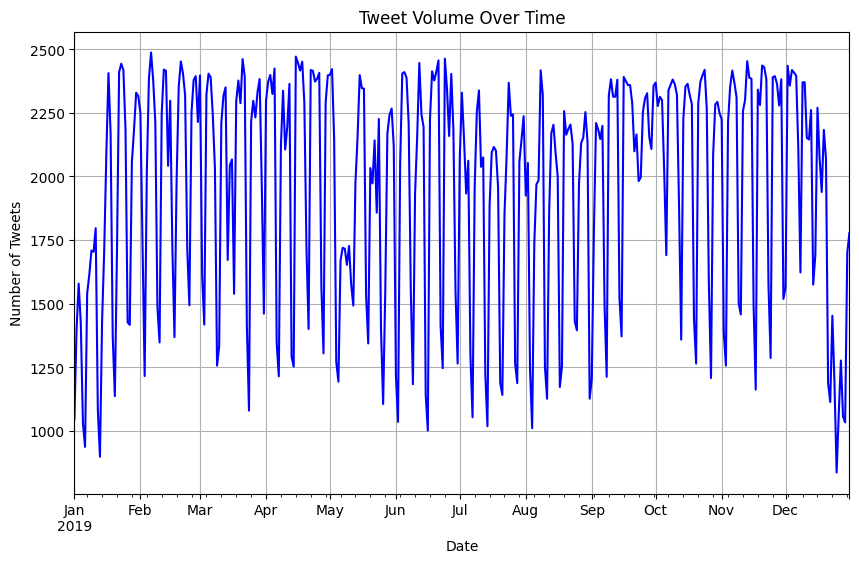

In [79]:
#aggregate tweet counts by day
tweet_counts_by_day = df.resample('D', on='created_at').size()

# Plot time series of tweet volume
plt.figure(figsize=(10, 6))
tweet_counts_by_day.plot(kind='line', color='blue')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


Distribution of tweet counts by hour of the day: 

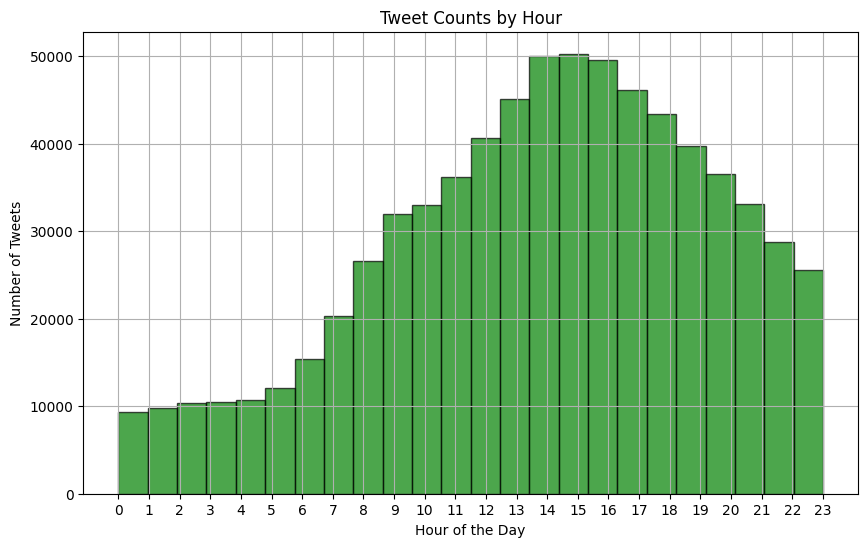

In [80]:
#extract hour from timestamp
df['hour'] = df['created_at'].dt.hour
#show the first 5 rows of the dataframe
#df.head()
#create histogram of tweet counts by hour
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, color='green', edgecolor='black', alpha=0.7)
plt.title('Tweet Counts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(24)) #set ticks to show all 24 hours
plt.grid(True)
plt.show()



Distribution of tweet counts by different authors: Identify the most active users on the platform.
RESULT: The most actives ones are : 
author_id              tweet_count
731164510489313280     20503
330509973              11684
4008204761              4643
4008390124              4102
16593287                2411

author_id
731164510489313280     20503
330509973              11684
4008204761              4643
4008390124              4102
16593287                2411
                       ...  
1021690280884559872        1
1090531503078105088        1
909222166675169280         1
808146452673245184         1
555045817                  1
Name: count, Length: 218217, dtype: Int64


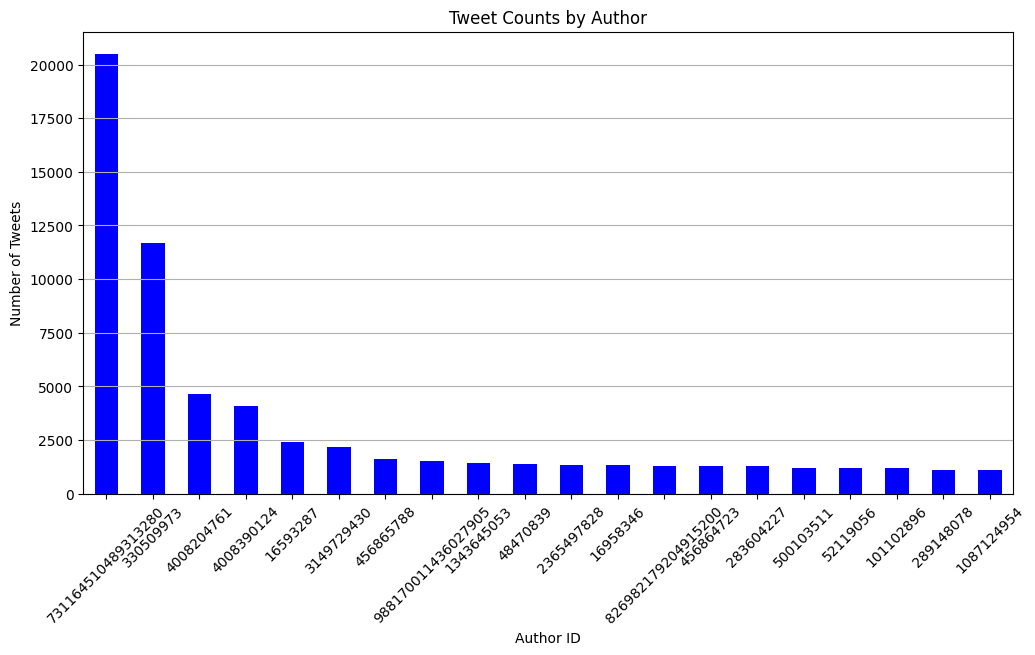

In [81]:
#group the data by author_id and count the number of tweets for each author
tweet_counts_by_author = df['author_id'].value_counts()
print(tweet_counts_by_author)
#plot only 20 most active authors
plt.figure(figsize=(12, 6))
tweet_counts_by_author.head(20).plot(kind='bar', color='blue')
plt.title('Tweet Counts by Author')
plt.xlabel('Author ID')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45) 
plt.grid(axis='y') #add grid lines only on the y-axis
plt.show()

Word Cloud of Most Frequent Hashtags: Popular topic or trends
RESULT: We can see that the most frequent hashtags are related to climate change, climate action, climate emergency,climate crisis, global warming etcc..

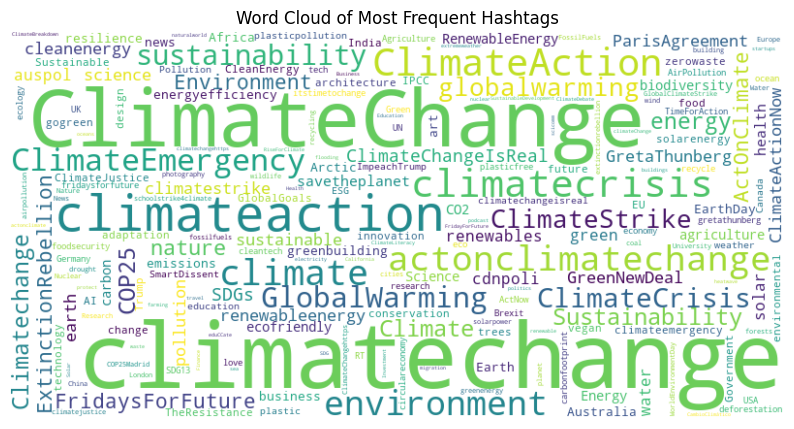

In [82]:
from wordcloud import WordCloud

# Extract hashtags from the text of the tweets
hashtags = df['text'].str.findall(r'#(\w+)').explode()
#count the frequency of each hashtag

hashtag_counts = hashtags.value_counts()
#generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_counts)
#plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Hashtags')
plt.axis('off')  # Hide axis
plt.show()




Scatter Plot of Like Count vs. Retweet Count. Identifying tweets that are particularly engaging or viral. 
RESULT: Most of the data points appear to cluster in the lower left corner of the plot, where the like count and retweet count are both relatively low.
There are a few data points scattered throughout the rest of the plot, with some points showing high retweet counts even for relatively low like counts. These outliers could indicate posts that went viral despite a low number of views, or there may be errors in the data.

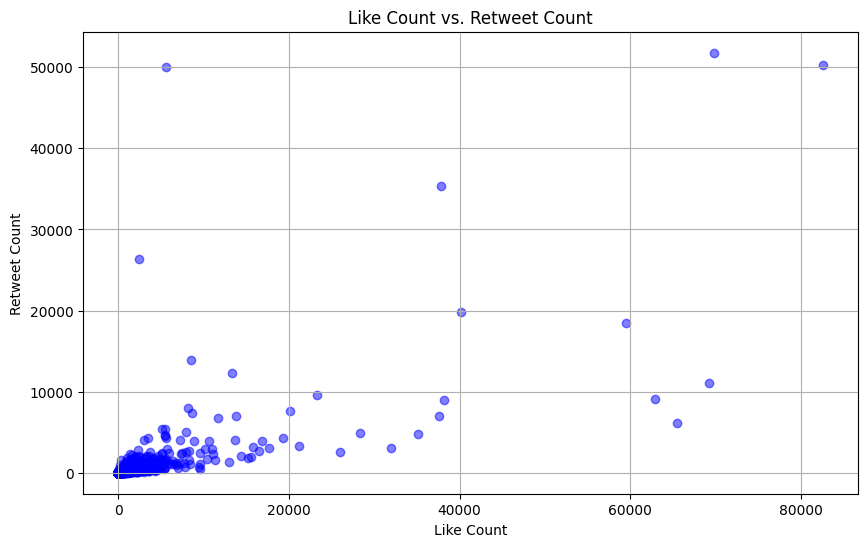

In [83]:
#extract like count and retweet count data
like_count = df['like_count']
retweet_count = df['retweet_count']

# Plot scatter plot of like count vs. retweet count
plt.figure(figsize=(10, 6))
plt.scatter(like_count, retweet_count, color='blue', alpha=0.5)
plt.title('Like Count vs. Retweet Count')
plt.xlabel('Like Count')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.show()

Time series of engagement metrics such as like count, retweet count, and reply count, to observe how these metrics have changed over time.
RESULTS: The like count(blue line), has the highest overall value. It starts at around 20,000 in January 2019 and fluctuates throughout the year, with its highest point around 150,000 in September 2019.
The retweet count(green line), follows a similar pattern to the blue line, starting at around 15,000 in January 2019 and reaching a peak of around 120,000 in September 2019.
The reply count(red line), has the lowest value throughout the year. It starts at around 10,000 in January 2019 and reaches a high of around 60,000 in November 2019.
The like and retweet count seem to follow a similar pattern, with significant increase in engagement in September 2019. Maybe this was influenced by 'The Global Climate Strike', which took place on September 20, 2019, and was the largest climate protest in history, with millions of people participating in over 150 countries.

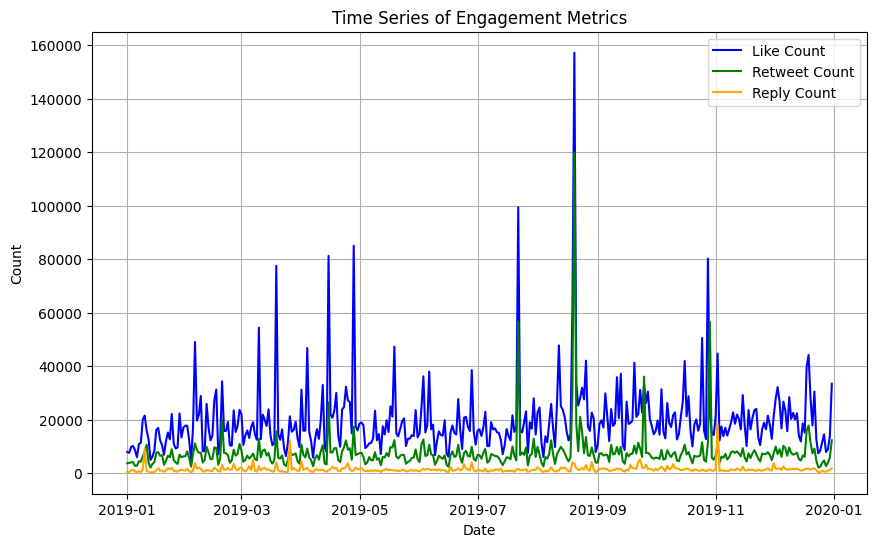

In [41]:
# Set 'created_at' column as the index
df.set_index('created_at', inplace=True)
# Resample the data to aggregate engagement metrics by day
engagement_metrics_daily = df.resample('D').sum()
#show the first 5 rows of the dataframe
engagement_metrics_daily.head()
# Plot time series of engagement metrics
plt.figure(figsize=(10, 6))
plt.plot(engagement_metrics_daily.index, engagement_metrics_daily['like_count'], label='Like Count', color='blue')
plt.plot(engagement_metrics_daily.index, engagement_metrics_daily['retweet_count'], label='Retweet Count', color='green')
plt.plot(engagement_metrics_daily.index, engagement_metrics_daily['reply_count'], label='Reply Count', color='orange')
plt.title('Time Series of Engagement Metrics')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Visualization of the distribution of tweet sources to see which platforms are most commonly used for tweeting.
RESULT: The most common source is Twitter for iPhone, followed by Twitter for Android and Twitter Web App.

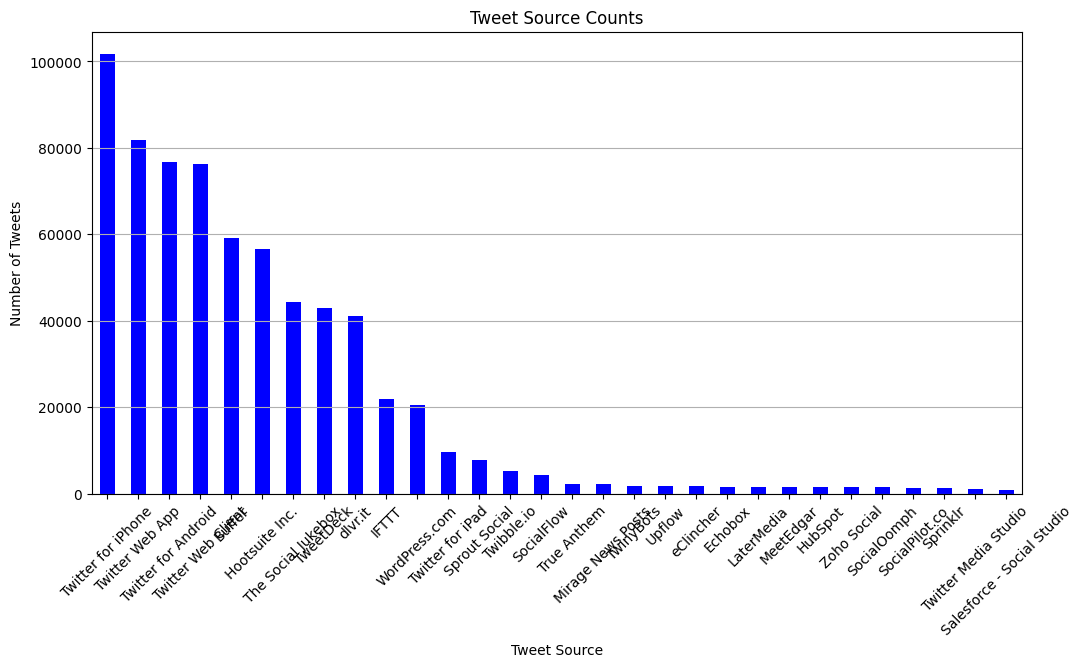

In [72]:
#count the frequency of each tweet source
tweet_source_counts = df['source'].value_counts()
#plot the 30 most frequent tweet sources
plt.figure(figsize=(12, 6))
tweet_source_counts.head(30).plot(kind='bar', color='blue')
plt.title('Tweet Source Counts')
plt.xlabel('Tweet Source')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45) #rotate x-axis labels for better readability
plt.grid(axis='y') #add grid lines only on the y-axis
plt.show()

